Group C <br>
 Mohan Kumar padmanabha <br>
Student ID 4575875<br>
Shiva prasad aggayala <br> 46233865  <br>
Srisai Raviteja Marupeddi<br>  45756546<br>


<br>Probing data set and its anamoly detection using the multiple anamoly detection methodologies <br>



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tldextract

In [ ]:
#importing modules
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import gc
import random
import os
import pickle
import tensorflow as tf
from tensorflow.python.util import deprecation
from urllib.parse import urlparse
import tldextract
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models, layers, backend, metrics
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Read the files into two dataframes.
df1 = pd.read_csv('/content/drive/MyDrive/AI final code data set/malicious_dataset.csv')
df2 = pd.read_csv('/content/drive/MyDrive/AI final code data set/attack_labels.csv')
df2_1 = pd.read_csv('/content/drive/MyDrive/AI final code data set/normal_dataset.csv')


# Merge the two dataframes, using _ID column as key

df3 = pd.merge(df1, df2, on = 'ip.src')
df3 = df3.append(df2_1)

print(df3)

df3.set_index('ip.src', inplace = True)

# Write it to a new CSV file
df3.to_csv('/content/drive/MyDrive/AI final code data set/CSV3.csv')

        frame_info.encap_type  ...         label
0                           1  ...  nmap_tcp_syn
1                           1  ...  nmap_tcp_syn
2                           1  ...  nmap_tcp_syn
3                           1  ...  nmap_tcp_syn
4                           1  ...  nmap_tcp_syn
...                       ...  ...           ...
103089                      1  ...           NaN
103090                      1  ...           NaN
103091                      1  ...           NaN
103092                      1  ...           NaN
103093                      1  ...           NaN

[140163 rows x 42 columns]


In [ ]:

# load data
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/AI final code data set/CSV3.csv')
# shuffle data
data = data.sample(frac=1, random_state=0)
print(f'Data size: {data.shape}')

data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data size: (140163, 42)


,ip.src,frame_info.encap_type,frame_info.time,frame_info.time_epoch,frame_info.number,frame_info.len,frame_info.cap_len,eth.type,ip.version,ip.hdr_len,ip.tos,ip.id,ip.flags,ip.flags.rb,ip.flags.df,ip.flags.mf,ip.frag_offset,ip.ttl,ip.proto,ip.checksum,ip.dst,ip.len,ip.dsfield,tcp.srcport,tcp.dstport,tcp.seq,tcp.ack,tcp.len,tcp.hdr_len,tcp.flags,tcp.flags.fin,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,tcp.options.mss_val,label
13848,172.16.0.16,1,"Dec 31, 1969 21:35:25.379795000 -03",2.125380e+03,26890,78,78,0x00000800,4.0,20.0,NaN,0x000002f0,0x00004000,0.0,1.0,0.0,0.0,62.0,6.0,0x00007994,10.10.10.10,64.0,0x00000000,63100.0,65532.0,1.0,0.0,0.0,44.0,0x00000001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16384.0,0x00003037,0.0,1436.0,unicornscan_tcp_fin
135151,92.192.62.116,1,"Nov 21, 2019 02:01:14.036651000 -03",1.574312e+09,193348,54,54,0x00000800,4.0,20.0,NaN,0x0000fdbf,0x00000000,0.0,0.0,0.0,0.0,241.0,6.0,0x0000cc9c,133.139.222.179,40.0,0x00000000,46886.0,63835.0,0.0,0.0,0.0,20.0,0x00000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1024.0,0x00004300,0.0,NaN,NaN
78582,203.180.205.36,1,"Nov 21, 2019 02:00:30.787588000 -03",1.574312e+09,81261,1436,66,0x00000800,4.0,20.0,NaN,0x00004b25,0x00004000,0.0,1.0,0.0,0.0,62.0,6.0,0x00007079,126.34.100.208,1422.0,0x00000000,41067.0,55879.0,31948401.0,1.0,1370.0,32.0,0x00000010,0.0,0.0,0.0,0.0,1.0,0.0,0.0,245.0,0x000078d6,0.0,NaN,NaN
76409,13.35.206.114,1,"Nov 21, 2019 02:00:29.319744000 -03",1.574312e+09,77018,1440,66,0x00000800,4.0,20.0,NaN,0x0000bed8,0x00004000,0.0,1.0,0.0,0.0,242.0,6.0,0x0000a7f7,163.221.157.24,1426.0,0x0000000a,443.0,49235.0,201034867.0,32945.0,1374.0,32.0,0x00000010,0.0,0.0,0.0,0.0,1.0,0.0,0.0,118.0,0x00003ee9,0.0,NaN,NaN
50287,88.162.108.220,1,"Nov 21, 2019 02:00:10.229634000 -03",1.574312e+09,25741,58,58,0x00000800,4.0,20.0,NaN,0x00007a9d,0x00000000,0.0,0.0,0.0,0.0,56.0,6.0,0x0000d232,133.139.234.242,44.0,0x00000000,50002.0,52785.0,0.0,1.0,0.0,24.0,0x00000012,0.0,1.0,0.0,0.0,1.0,0.0,0.0,16384.0,0x00004ef9,0.0,1460.0,NaN


In [ ]:
#Feature reduction
data=data.drop(['ip.version', 'ip.hdr_len','ip.tos','ip.flags.rb','ip.flags.mf','ip.proto','ip.dst','ip.dsfield','tcp.len','tcp.urgent_pointer','frame_info.time'], axis=1)
data["label"] = data["label"].replace(np.nan,"Normal_traffic")

print (data)


                ip.src  ...                label
13848      172.16.0.16  ...  unicornscan_tcp_fin
135151   92.192.62.116  ...       Normal_traffic
78582   203.180.205.36  ...       Normal_traffic
76409    13.35.206.114  ...       Normal_traffic
50287   88.162.108.220  ...       Normal_traffic
...                ...  ...                  ...
41993    13.35.206.114  ...       Normal_traffic
97639   120.253.44.121  ...       Normal_traffic
95939    80.99.190.167  ...       Normal_traffic
117952   13.35.206.114  ...       Normal_traffic
43567   64.216.120.151  ...       Normal_traffic

[140163 rows x 31 columns]


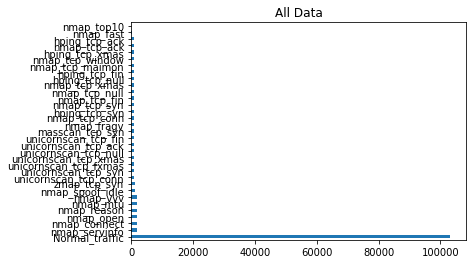

In [ ]:
#Data distribustion graph
data.label.value_counts().plot.barh()
plt.title('All Data')

plt.show()
#plt.figure(figsize=(100,200))

In [ ]:
print (data.label.value_counts())

Normal_traffic           103094
nmap_servinfo              2016
nmap_connect               2008
nmap_open                  2006
nmap_reason                2006
nmap_mtu                   2006
nmap_vvv                   2002
nmap_spoof_idle            1417
zmap_tcp_syn               1250
unicornscan_tcp_conn       1026
unicornscan_tcp_syn        1017
unicornscan_tcp_fxmas      1014
unicornscan_tcp_xmas       1014
unicornscan_tcp_null       1014
unicornscan_tcp_ack        1014
unicornscan_tcp_fin        1014
masscan_tcp_syn            1003
nmap_fragv                 1003
nmap_tcp_conn              1002
hping_tcp_syn              1001
nmap_tcp_syn               1001
nmap_tcp_fin               1001
nmap_tcp_null              1001
nmap_tcp_xmas              1001
hping_tcp_null             1000
hping_tcp_fin              1000
nmap_tcp_maimon            1000
nmap_tcp_window            1000
hping_tcp_xmas             1000
nmap_tcp_ack               1000
hping_tcp_ack              1000
nmap_fas

In [ ]:
# encoding features 
import struct
from sklearn.preprocessing import LabelEncoder

unique_value1 = {}
i1=0
for feature1 in data["ip.src"] :
 # print (feature)
  if feature1 not in unique_value1 :
    unique_value1[feature1]=i1
    i1+=1
print (unique_value1)
#data.isna()
#data.isnull()

# converting Hex and other strings to float ,int values
data["ip.src"].replace({i1:unique_value1[i1] for i1 in unique_value1}, inplace=True)


data["eth.type"].replace({j : struct.unpack('!f', bytes.fromhex(j[2:]))[0] for j in data["eth.type"] if type(j) != float} , inplace=True )

data["ip.id"].replace({ j : struct.unpack('!f', bytes.fromhex(j[2:]))[0] for j in data["ip.id"] if type(j) != float} , inplace=True )
data["ip.checksum"].replace({ j : struct.unpack('!f', bytes.fromhex(j[2:]))[0] for j in data["ip.checksum"] if type(j) != float} , inplace=True )
data["ip.flags"].replace({ j : struct.unpack('!f', bytes.fromhex(j[2:]))[0] for j in data["ip.flags"] if type(j) != float} , inplace=True )
data["tcp.flags"].replace({ j : struct.unpack('!f', bytes.fromhex(j[2:]))[0] for j in data["tcp.flags"] if type(j) != float} , inplace=True )
data["tcp.checksum"].replace({ j : struct.unpack('!f', bytes.fromhex(j[2:]))[0] for j in data["tcp.checksum"] if type(j) != float} , inplace=True )
  

{'172.16.0.16': 0, '92.192.62.116': 1, '203.180.205.36': 2, '13.35.206.114': 3, '88.162.108.220': 4, '163.221.219.221': 5, '172.16.0.108': 6, '54.136.224.105': 7, nan: 8, '172.16.0.109': 9, '120.253.44.121': 10, '172.16.0.22': 11, '172.16.0.110': 12, '172.16.0.9': 13, '89.8.230.1': 14, '23.4.190.158': 15, '172.16.0.105': 16, '172.16.0.11': 17, '172.16.0.20': 18, '202.11.241.113': 19, '111.208.11.86': 20, '35.110.181.164': 21, '17.242.68.198': 22, '172.16.0.13': 23, '172.16.0.3': 24, '163.221.156.200': 25, '172.16.0.19': 26, '172.16.0.6': 27, '163.221.171.52': 28, '179.213.118.43': 29, '223.242.93.8': 30, '172.16.0.7': 31, '220.124.105.24': 32, '172.16.0.102': 33, '133.5.44.151': 34, '172.16.0.106': 35, '163.221.159.127': 36, '172.16.0.104': 37, '133.5.216.203': 38, '89.8.238.162': 39, '163.221.17.141': 40, '84.160.190.204': 41, '133.139.205.65': 42, '185.79.219.145': 43, '83.158.21.44': 44, '99.80.177.231': 45, '80.99.191.154': 46, '117.58.23.11': 47, '202.11.244.165': 48, '80.99.191.1

In [ ]:
# Replacing NaN values to 0's and printing the resultant data set for reference
import math


data["tcp.options.mss_val"] = data["tcp.options.mss_val"].replace(np.nan,0)
data["ip.id"] = data["ip.id"].replace(np.nan,0)
data["ip.flags"] = data["ip.flags"].replace(np.nan,0)
data["ip.flags.df"] = data["ip.flags.df"].replace(np.nan,0)
data["ip.frag_offset"] = data["ip.frag_offset"].replace(np.nan,0)
data["ip.ttl"] = data["ip.ttl"].replace(np.nan,0)
data["ip.len"] = data["ip.len"].replace(np.nan,0)
data["tcp.srcport"] = data["tcp.srcport"].replace(np.nan,0)
data["tcp.dstport"] = data["tcp.dstport"].replace(np.nan,0)
data["tcp.seq"] = data["tcp.seq"].replace(np.nan,0)
data["tcp.ack"] = data["tcp.ack"].replace(np.nan,0)
data["tcp.hdr_len"] = data["tcp.hdr_len"].replace(np.nan,0)
data["tcp.flags"] = data["tcp.flags"].replace(np.nan,0)
data["tcp.flags.fin"] = data["tcp.flags.fin"].replace(np.nan,0)
data["tcp.flags.syn"] = data["tcp.flags.syn"].replace(np.nan,0)
data["tcp.flags.reset"] = data["tcp.flags.reset"].replace(np.nan,0)
data["tcp.flags.push"] = data["tcp.flags.push"].replace(np.nan,0)
data["tcp.flags.ack"] = data["tcp.flags.ack"].replace(np.nan,0)
data["tcp.flags.urg"] = data["tcp.flags.urg"].replace(np.nan,0)
data["tcp.flags.cwr"] = data["tcp.flags.cwr"].replace(np.nan,0)
data["tcp.window_size"] = data["tcp.window_size"].replace(np.nan,0)
data["tcp.checksum"] = data["tcp.checksum"].replace(np.nan,0)
data["ip.checksum"] = data["ip.checksum"].replace(np.nan,0)
data["ip.id"] = data["ip.id"].replace(np.nan,0)
X = data.iloc[:, 0:30].values
Y = data.iloc[:, 30:].values

z = data.isnull().sum()
z1 = data.isna().sum()
print(z1)
print(Y)
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

print(Y)

ip.src                   0
frame_info.encap_type    0
frame_info.time_epoch    0
frame_info.number        0
frame_info.len           0
frame_info.cap_len       0
eth.type                 0
ip.id                    0
ip.flags                 0
ip.flags.df              0
ip.frag_offset           0
ip.ttl                   0
ip.checksum              0
ip.len                   0
tcp.srcport              0
tcp.dstport              0
tcp.seq                  0
tcp.ack                  0
tcp.hdr_len              0
tcp.flags                0
tcp.flags.fin            0
tcp.flags.syn            0
tcp.flags.reset          0
tcp.flags.push           0
tcp.flags.ack            0
tcp.flags.urg            0
tcp.flags.cwr            0
tcp.window_size          0
tcp.checksum             0
tcp.options.mss_val      0
label                    0
dtype: int64
[['unicornscan_tcp_fin']
 ['Normal_traffic']
 ['Normal_traffic']
 ...
 ['Normal_traffic']
 ['Normal_traffic']
 ['Normal_traffic']]
[27  0  0 ...  0  0

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#using standard scalar (scaling data)
#separating labels and features 
from sklearn.preprocessing import StandardScaler


#splitting the data for training and evaluation
val_size = 0.2
train_data, val_data, train_Y, val_Y = train_test_split(X, Y, test_size=val_size, stratify=data['label'], random_state=0)
print(f'Train shape: {train_data.shape}, Validation shape: {val_data.shape}')


stand_scale = StandardScaler()
X_train = stand_scale.fit_transform(train_data)
X_test = stand_scale.transform(val_data)


Train shape: (112130, 30), Validation shape: (28033, 30)


In [ ]:
print(X_train, set(val_Y))


[[ 1.57483681e+00  0.00000000e+00  5.99636191e-01 ...  1.73101851e-03
  -7.45757878e-01 -4.98003525e-01]
 [-3.62961405e-01  0.00000000e+00 -1.66766946e+00 ... -1.07239314e-01
   1.30717496e+00  1.95530169e+00]
 [-7.17358985e-02  0.00000000e+00  5.99636159e-01 ... -1.17286407e-01
   1.26063689e+00 -4.98003525e-01]
 ...
 [-3.62220373e-01  0.00000000e+00  5.99636150e-01 ... -1.17312201e-01
   1.36657087e+00 -4.98003525e-01]
 [-8.65565349e-02  0.00000000e+00  5.99636162e-01 ... -1.47905811e-02
  -7.75846252e-01  1.95530169e+00]
 [ 8.45661497e-01  0.00000000e+00  5.99636094e-01 ... -1.18859892e-01
   1.60415449e+00 -4.98003525e-01]] {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32}


In [ ]:
  #Isolation forest
  from sklearn.ensemble import IsolationForest

  clf = IsolationForest(random_state=3)# hyperparameter tuning
  clf.fit(X_train)

  # predictions
  y_pred_train = clf.predict(X_train)
  y_pred_test = clf.predict(X_test)
  #y_pred_outliers = clf.predict(X_outliers)
  
  #print(list(y_pred_test).count(1), y_pred_test.shape[0])
  print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])
  

Accuracy: 0.7714479363607177


0.9957193307887133
[[20619     0     0 ...     0     0     0]
 [    0   200     0 ...     0     0     0]
 [    0     0   200 ...     0     0     0]
 ...
 [    0     0     0 ...   175     0     0]
 [    0     0     0 ...     0   203     0]
 [    0     0     0 ...     0     0   250]]


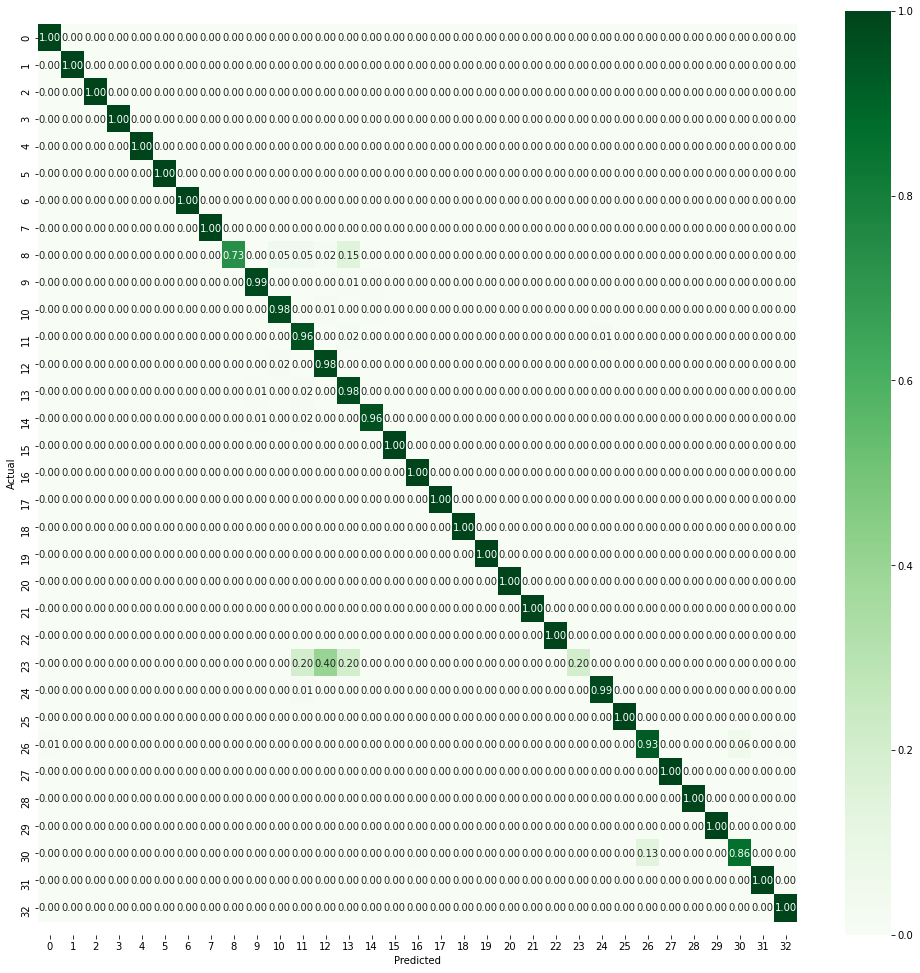

No handles with labels found to put in legend.


[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


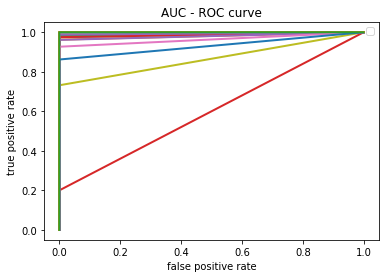

In [ ]:
  # KNN implementation, Accuracy for the model, confusion matrix AUC-ROC curve for the same .
  from sklearn.neighbors import KNeighborsClassifier
  neigh = KNeighborsClassifier(n_neighbors=7)# hyperparameter tuning
  neigh.fit(X_train, train_Y)
  y_pred = neigh.predict(X_test)
  from sklearn.metrics import accuracy_score

  print(accuracy_score(val_Y, y_pred))
  from sklearn import metrics
  y_test1 = val_Y
  y_pred1 = y_pred
  c_matrix = metrics.confusion_matrix(y_test1, y_pred1)
  print(c_matrix)
  c_matrix = c_matrix.astype('float') / c_matrix.sum(axis=1)[:, np.newaxis]
  import seaborn as sns
  import matplotlib.pyplot as plt
  def confusion_matrix(confusion_matrix, class_names, figsize = (30,30), fontsize=14):
      df_cm = pd.DataFrame(
          confusion_matrix, index=class_names, columns=class_names, 
      )
      fig = plt.figure(figsize=figsize)
      try:
          heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
      except ValueError:
          raise ValueError("Confusion matrix values must be integers.")
      heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
      heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
      plt.ylabel('True label')
      plt.xlabel('Predicted label')

  import matplotlib.pyplot as plt
  from sklearn.metrics import confusion_matrix
  import seaborn as sns

  cmn = c_matrix.astype('float') / c_matrix.sum(axis=1)[:, np.newaxis]
  fig, ax = plt.subplots(figsize=(17,17))
  sns.heatmap(cmn, annot=True, fmt='.2f', cmap="Greens")

  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show(block=False)


  from matplotlib import pyplot
  from sklearn.metrics import roc_curve
  from sklearn import metrics
  from numpy import array
  from numpy import argmax
  from sklearn.preprocessing import LabelEncoder
  from sklearn.preprocessing import OneHotEncoder

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  f = [[0.0 for x in range(33)] for y in range(len(y_pred))] 

  for i in range(len(y_pred)):
    f[i][y_pred[i]] = 1.0
  f1 = [[0.0 for x in range(33)] for y in range(len(val_Y))] 
  for i1 in range(len(val_Y)):
    f1[i1][val_Y[i1]] = 1.0

  a = np.asarray(f1)
  b = np.asarray(f) 
  print(a)
  for i in range(33):
      fpr[i], tpr[i], _ = roc_curve(a[:, i],
                                    b[:, i])
      plt.plot(fpr[i], tpr[i], lw=2)#, label=class_label_auc[i])
     # sns.append((list(fpr[i]), list(tpr[i])))
  plt.xlabel("false positive rate")
  plt.ylabel("true positive rate")
  plt.legend(loc="best")
  plt.title("AUC - ROC curve")
  plt.show()

[ 0  0  0 ... 30 11  0]
[ 0  0  0 ... 30 11  0]
0.9999286555131452
[[20619     0     0 ...     0     0     0]
 [    0   200     0 ...     0     0     0]
 [    0     0   200 ...     0     0     0]
 ...
 [    0     0     0 ...   203     0     0]
 [    0     0     0 ...     0   203     0]
 [    0     0     0 ...     0     0   250]]


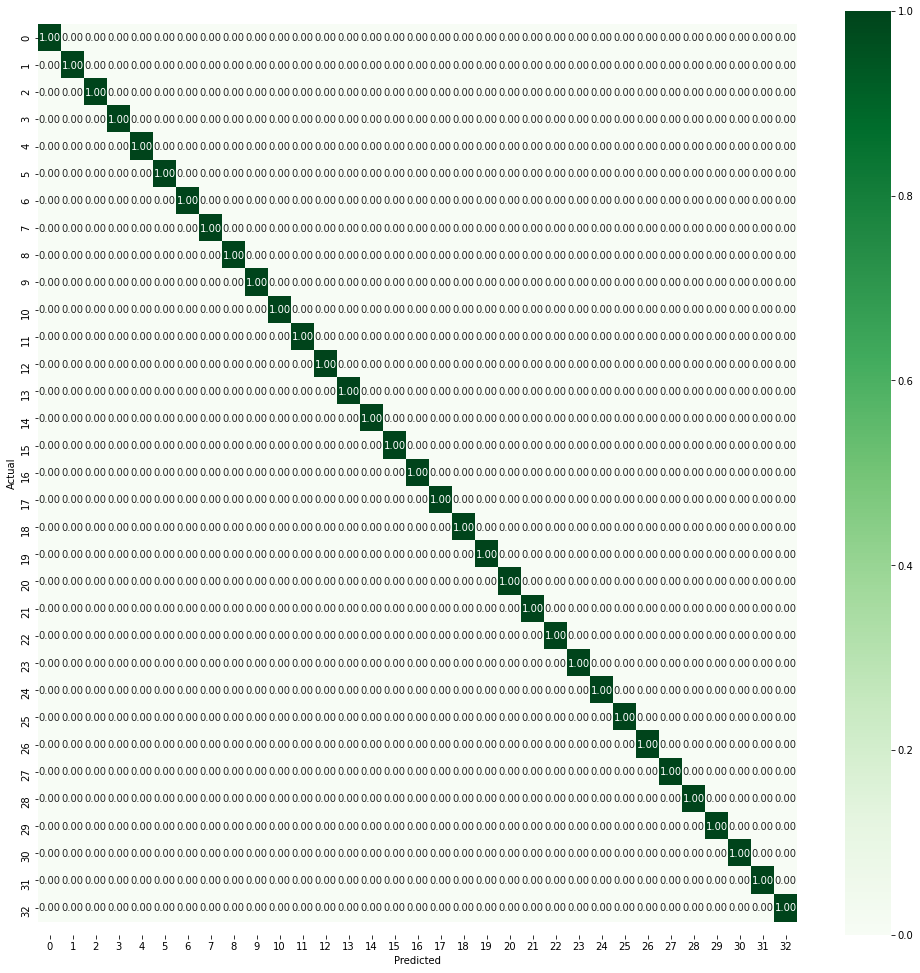

No handles with labels found to put in legend.


[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


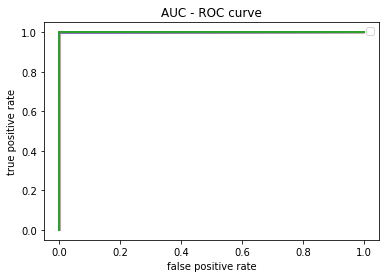

In [ ]:
  #Random forest classification algorithm

  from sklearn.ensemble import RandomForestClassifier
  # Fitting Random Forest Classification to the Training set
  classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42) # hyper parameter tunning
  classifier.fit(X_train, train_Y)

  # Predicting the Test set results
  y_pred = classifier.predict(X_test)
  print(y_pred)
  print(val_Y)


  print(accuracy_score(val_Y, y_pred))
  from sklearn import metrics
  y_test1 = val_Y
  y_pred1 = y_pred
  c_matrix = metrics.confusion_matrix(y_test1, y_pred1)
  print(c_matrix)
  c_matrix = c_matrix.astype('float') / c_matrix.sum(axis=1)[:, np.newaxis]
  import seaborn as sns
  import matplotlib.pyplot as plt
  def confusion_matrix(confusion_matrix, class_names, figsize = (30,30), fontsize=14):
      df_cm = pd.DataFrame(
          confusion_matrix, index=class_names, columns=class_names, 
      )
      fig = plt.figure(figsize=figsize)
      try:
          heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
      except ValueError:
          raise ValueError("Confusion matrix values must be integers.")
      heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
      heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
      plt.ylabel('True label')
      plt.xlabel('Predicted label')

  import matplotlib.pyplot as plt
  from sklearn.metrics import confusion_matrix
  import seaborn as sns

  cmn = c_matrix.astype('float') / c_matrix.sum(axis=1)[:, np.newaxis]
  fig, ax = plt.subplots(figsize=(17,17))
  sns.heatmap(cmn, annot=True, fmt='.2f', cmap="Greens")

  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show(block=False)

  
  from matplotlib import pyplot
  from sklearn.metrics import roc_curve
  from sklearn import metrics
  from numpy import array
  from numpy import argmax
  from sklearn.preprocessing import LabelEncoder
  from sklearn.preprocessing import OneHotEncoder

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  f = [[0.0 for x in range(33)] for y in range(len(y_pred))] 

  for i in range(len(y_pred)):
    f[i][y_pred[i]] = 1.0
  f1 = [[0.0 for x in range(33)] for y in range(len(val_Y))] 
  for i1 in range(len(val_Y)):
    f1[i1][val_Y[i1]] = 1.0

  a = np.asarray(f1)
  b = np.asarray(f) 
  print(a)
  for i in range(33):
      fpr[i], tpr[i], _ = roc_curve(a[:, i],
                                    b[:, i])
      plt.plot(fpr[i], tpr[i], lw=2)#, label=class_label_auc[i])
      #ans.append((list(fpr[i]), list(tpr[i])))
  plt.xlabel("false positive rate")
  plt.ylabel("true positive rate")
  plt.legend(loc="best")
  plt.title("AUC - ROC curve")
  plt.show()

0.996147397709842
[[20619     0     0 ...     0     0     0]
 [    0   200     0 ...     0     0     0]
 [    0     0   200 ...     0     0     0]
 ...
 [    0     0     0 ...   163     0     0]
 [    0     0     0 ...     0   203     0]
 [    0     0     0 ...     0     0   250]]


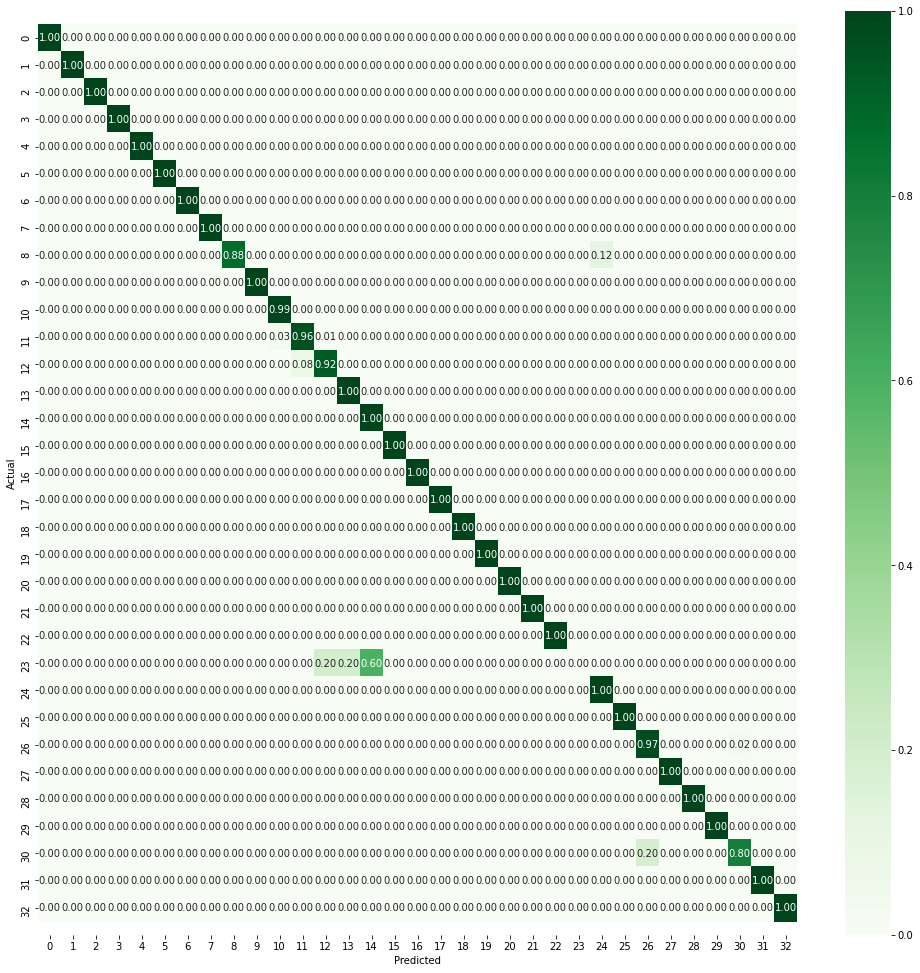

No handles with labels found to put in legend.


[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


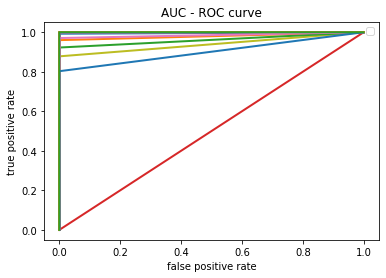

In [ ]:
  # Implementing SVM algorithm for the data set
  from sklearn.svm import SVC
  classifier = SVC(kernel = 'rbf', random_state = 0,C = 3, probability=True) # changing the parameters will get hyperparameter tuning.
  d = classifier.fit(X_train, train_Y)
  y_pred = classifier.predict(X_test)
  print(accuracy_score(val_Y, y_pred))

  from sklearn import metrics
  y_test1 = val_Y
  y_pred1 = y_pred
  c_matrix = metrics.confusion_matrix(y_test1, y_pred1)
  print(c_matrix)
  c_matrix = c_matrix.astype('float') / c_matrix.sum(axis=1)[:, np.newaxis]
  import seaborn as sns
  import matplotlib.pyplot as plt
  def confusion_matrix(confusion_matrix, class_names, figsize = (30,30), fontsize=14):
      df_cm = pd.DataFrame(
          confusion_matrix, index=class_names, columns=class_names, 
      )
      fig = plt.figure(figsize=figsize)
      try:
          heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
      except ValueError:
          raise ValueError("Confusion matrix values must be integers.")
      heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
      heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
      plt.ylabel('True label')
      plt.xlabel('Predicted label')

  import matplotlib.pyplot as plt
  from sklearn.metrics import confusion_matrix
  import seaborn as sns

  cmn = c_matrix.astype('float') / c_matrix.sum(axis=1)[:, np.newaxis]
  fig, ax = plt.subplots(figsize=(17,17))
  sns.heatmap(cmn, annot=True, fmt='.2f', cmap="Greens")

  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show(block=False)

    
  from matplotlib import pyplot
  from sklearn.metrics import roc_curve
  from sklearn import metrics
  from numpy import array
  from numpy import argmax
  from sklearn.preprocessing import LabelEncoder
  from sklearn.preprocessing import OneHotEncoder

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  f = [[0.0 for x in range(33)] for y in range(len(y_pred))] 

  for i in range(len(y_pred)):
    f[i][y_pred[i]] = 1.0
  f1 = [[0.0 for x in range(33)] for y in range(len(val_Y))] 
  for i1 in range(len(val_Y)):
    f1[i1][val_Y[i1]] = 1.0

  a = np.asarray(f1)
  b = np.asarray(f) 
  print(a)
  for i in range(33):
      fpr[i], tpr[i], _ = roc_curve(a[:, i],
                                    b[:, i])
      plt.plot(fpr[i], tpr[i], lw=2)#, label=class_label_auc[i])
      #ans.append((list(fpr[i]), list(tpr[i])))
  plt.xlabel("false positive rate")
  plt.ylabel("true positive rate")
  plt.legend(loc="best")
  plt.title("AUC - ROC curve")
  plt.show()